In [3]:
%pylab inline
import numpy as np
import pandas as pd
import scipy
from scipy import linalg
from scipy.special import logsumexp
import math
from typing import List, Tuple
from numpy.typing import ArrayLike
import numpy.typing as npt

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$


# Q3: Speech Recognition (20pt)
**Background:** Hidden Markov models are often used for speech recognition.  In such applications, the sequence of hidden states $z_1,...,z_n$ is a sequence of phonemes (discrete units of verbal sound, see https://en.wikipedia.org/wiki/Phoneme).  The observations $x_1,...,x_n$ are recorded sounds that are represented in terms of summary features; Mel-frequency cepstral coefficients (MFCCs), which are related to Fourier coefficients, are a common choice of features for speech recognition.  Each observation $x_t$ is then a vector of features corresponding to the sound recorded at time interval $t$.  Note that this assumes the audio signal has already been parsed into time intervals $1,...,n$ corresponding to the phonemes.

In this exercise, we will consider a simplified version of the hidden Markov models used for speech recognition.  We will assume that there are only 10 types of phoneme and that the observations $x_t$ are 5-dimensional and normally distributed, and we will use a first-order Markov model rather than a higher-order Markov model.  (Also, just to clarify, all of the parameters in this exercise are purely simulated, and shouldn't be interpreted as representing real speech recognition parameters.)

**Setup**:
The hidden values z_t belong to the set ${1,...,m}$, where $m = 10$.  Each observation $x_t$ is a 5-dimensional vector, $x_t = (x_{t1},...,x_{t5})$.  There are $n = 1000$ observations, $x_1,...,x_n$, in the file `x.txt`.  The parameters of the model are all given below.

**Paramerer:**
- Initial distribution: $\pi[s] = p(z_1=s)$
$$\pi =\bcm  .11	&.01&	.31&	.09	&.17&	.16&	.04&	.05&	.01&	.05\ecm$$

- Transition matrix: $P[r,s] = p(z_t=s | z_{t-1}=r)$ transition probability of $r\rightarrow s$
$$P= \bcm
.09	&0	&.01&	0&	0&	.01&	.45&	.07&	0&	.37\\
0	&.04&	0	&.51&	.19	&.03&	.02&	0	&.02&	.19 \\
0&	.06	&.02&	.5&	.01&	0&	0&	.23&	.09&	.09\\
0	&.22&	.65&	.06&	0&	.02&	0&	0&	.01&	.04\\
0&	.72&	0&	0&	0&	.06&	.14&	.02&	.02&	.04\\
0&	.43&	.14&	0&	.01&	0&	.15&	.17&	0&	.1\\
.32&	0&	.14&	.01&	.23&	.14&	.02&	0&	.11&	.03\\
.3&	0&	.36&	.04&	.05&	.17&	0&	0&	0&	.08\\
0&	0&	.51&	.02&	.11&	.05&	.07&	.16&	.03&	.05\\
.3&	0&	0	&.12&	.02&	.01&	.01&	0	&.33	&.21\ecm $$

- Emission distributions: $P(X_{tj} | Z_t=s) \sim N(\mu[s,j], \sigma[s,j]^2)$, independently for $j = 1,...,5$, where $\mu$ and $\sigma$ are below.

$$\mu =
\bcm 1.19&	2.33	&-6.92&	-.66&	-5.16 \\
1.53	&3.85&	3.18&	-8.46&	-1.34\\
-2.39&	1.84&	2.68&	-.27&	.28\\
-.04&	-2.09	&2.2&	4.89	&1.37\\
-3.36&	1.63&	-.25&	2.27&	6.94\\
1.24&	-.2&	5.35&	3.05&	5.2\\
9.18&	-2.77&	-.29&	1.51&	.83\\
-9.07&	-7.1&	-2.98&	-2.58	&-4.04\\
2.12&	.48	&-4.88&	-2.66&	-3.4\\
1.73&	-3.03&	-.21&	-7.21	&4.52 \ecm$$

$$\sigma =
\bcm 2.68	&2.91&	1.2&	4.65&	1.66 \\
1.15&	1.9	&1.22	&.91&	1.18\\
.72&	1.6&	.98&	2.06&	1.78\\
1.64&	1.95&	1.8&	5.25&	2.57\\
2.86&	2.43&	2.42&	4.3&	3.25\\
1.46&	11.77&	4.34&	1.46&	8.68\\
2.61&	1.18&	2.29&	1.05&	1.56\\
2.53&	10.38&	1.81&	1.51&	1.9\\
1.86&	2.35&	1.4&	2.32	&2.73\\
1.42&	2.23&	1.13&	1.38&	3.22 \ecm $$






---


**Task 1(8pt):**
Implement the Viterbi algorithm and compute the sequence $z^*_1,...,z^*_n$ that maximizes the posterior probability $p(z_1,...,z_n | x_1,...,x_n)$.



---


**Task 2(8pt):** The file "z_true.txt" contains the sequence of $z$'s that I used to generate these $x$'s.  Evaluate the accuracy of your $z^*$ sequence by measuring what fraction of $z$'s you got right.  Compare this with the accuracy of the sequence $z^{**}$ obtained by following simpler approach: for each t separately, define $z^{**}_t$ to be the value maximizing $p(x_t | z_t)$.



---



**Task 3(4pt):** Plot the true $z_t$ along with $z^*_t$ and $z^{**}_t$, for $t = 1,...,100$ (only display the first 100 values), and indicate where they differ.


In [4]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/x.txt?raw=true -O x.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/z_true.txt?raw=true -O z_true.txt


--2023-12-07 01:18:35--  https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/x.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94340 (92K) [text/plain]
Saving to: ‘x.txt’

x.txt               100%[===================>]  92.13K  --.-KB/s    in 0.02s   

2023-12-07 01:18:35 (5.48 MB/s) - ‘x.txt’ saved [94340/94340]

--2023-12-07 01:18:35--  https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/z_true.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2131 (2.1K

In [37]:
def get_emission(x, mu, sigma):

  emission_col = len(x)
  emission_row = len(mu)
  emission = np.zeros((emission_col, emission_row))

  for t in range(emission_col):
    s_list=[]
    for s in range(emission_row):
      temp_sigma_s = np.matmul(sigma[s].reshape(1,5), sigma[s].reshape(5,1))
      gamma = (-.5)*np.matmul((x[t] - mu[s]).reshape(1,5), (x[t] - mu[s]).reshape(5,1))/np.square(temp_sigma_s)
      divisor = np.sqrt(2*np.pi * np.square(temp_sigma_s))
      emission[t][s] = np.exp(gamma) / divisor


  return emission

def viterbi_backtracking(log_initial, log_transition, log_emission, v):
    """
    Args:
        initial: a vector of length N
        transition: a matrix of shape N * N
        emission: a matrix of shape V * N
        v: observed sequence, a vector of length T

    Returns:
        max_log_p: a float number, maximum probability of the latent sequence
        max_h: max probability latent sequence, a vector of length T
    """
    T = len(v)
    N = log_emission.shape[1]

    log_s = np.zeros((T, N))
    max_ptr = np.zeros((T, N))
    log_s[0] = log_emission[0] + log_initial

    for t in range(1, T):
        log_phi_t = log_transition + log_emission[t].reshape(1, N)
        log_s_phi_t = log_s[t-1].reshape(N, 1) + log_phi_t
        log_s[t] = np.max(log_s_phi_t, axis=0)
        max_ptr[t] = np.argmax(log_s_phi_t, axis=0) # record the back pointer

    max_log_p_h = np.max(log_s[T - 1])

    # backtracking start
    max_h = np.zeros(T).astype(int)
    max_h[T - 1] = np.argmax(log_s[T - 1])
    for t in range(T - 2, -1, -1):
        max_h[t] = max_ptr[t + 1, max_h[t + 1]]
    return max_log_p_h, max_h


x = np.loadtxt('x.txt')

initial = np.array([.11, .01,	.31,	.09, .17,	.16,	.04,	.05,	.01,	.05])

transition = np.array([[.09,0,.01,0,0,.01,.45,.07,0,.37],
                      [0,.04,0,.51,.19,.03,.02,0,.02,.19],
                      [0,.06,.02,.5,.01,0,0,.23,.09,.09],
                      [0,.22,.65,.06,0,.02,0,0,.01,.04],
                      [0,.72,0,0,0,.06,.14,.02,.02,.04],
                      [0,.43,.14,0,.01,0,.15,.17,0,.1],
                      [.32,0,.14,.01,.23,.14,.02,0,.11,.03],
                      [.3,0,.36,.04,.05,.17,0,0,0,.08],
                      [0,0,.51,.02,.11,.05,.07,.16,.03,.05],
                      [.3,0,0,.12,.02,.01,.01,0,.33,.21]])

mu = np.array([[1.19,2.33,-6.92,-.66,-5.16],
              [1.53,3.85,3.18,-8.46,-1.34],
              [-2.39,1.84,2.68,.27,.28],
              [-.04,-2.09,2.2,4.89,1.37],
              [-3.36,1.63,-.25,2.27,6.94],
              [1.24,-.2,5.35,3.05,5.2],
              [9.18,-2.77,-.29,1.51,.83],
              [-9.07,-7.1,-2.98,-2.58,-4.04],
              [2.12,.48,-4.88,-2.66,-3.4],
              [1.73,-3.03,-.21,-7.21,4.52]])

sigma = np.array([[2.68,2.91,1.2,4.65,1.66],
                 [1.15,1.9,1.22,.91,1.18],
                 [.72,1.6,.98,2.06,1.78],
                 [1.64,1.95,1.8,5.25,2.57],
                 [2.86,2.43,2.42,4.3,3.25],
                 [1.46,11.77,4.34,1.46,8.68],
                 [2.61,1.18,2.29,1.05,1.56],
                 [2.53,10.38,1.81,1.51,1.9],
                 [1.86,2.35,1.4,2.32,2.73],
                 [1.42,2.23,1.13,1.38,3.22]])

emission = get_emission(x, mu, sigma)

prob, sequence = viterbi_backtracking(np.log(initial), np.log(transition), np.log(emission), x)
print(len(sequence))



1000


<ipython-input-37-3c0cd96a777f>:92: RuntimeWarning: divide by zero encountered in log
  prob, sequence = viterbi_backtracking(np.log(initial), np.log(transition), np.log(emission), x)


In [62]:
z_true = np.loadtxt('z_true.txt')
# Your code starts here
# Task 2

yes_true_vs_seq = 0

yes_true_vs_max_prob = 0

for i in range(len(z_true)):
  if z_true[i]==sequence[i]:
    yes_true_vs_seq+=1

max_prob = []

i, = np.where(np.isclose(initial, np.max(initial)))
for i in range(len(z_true)):
  if i==0:
    j, = np.where(np.isclose(initial, np.max(initial)))
    max_prob.append(j[0])
  else:
    j, = np.where(np.isclose(emission[max_prob[i-1]], np.max(emission[max_prob[i-1]])))
    max_prob.append(j[0])

for i in range(len(z_true)):
  if z_true[i]==max_prob[i]:
    yes_true_vs_max_prob+=1

print(np.max(transition[max_prob[0]]))
print("Accuracy of z_true vs part 1 sequence: ", yes_true_vs_seq/len(z_true))
print("Accuracy of z_true vs max prob sequence: ", yes_true_vs_max_prob/len(z_true))



0.5
Accuracy of z_true vs part 1 sequence:  0.092
Accuracy of z_true vs max prob sequence:  0.107


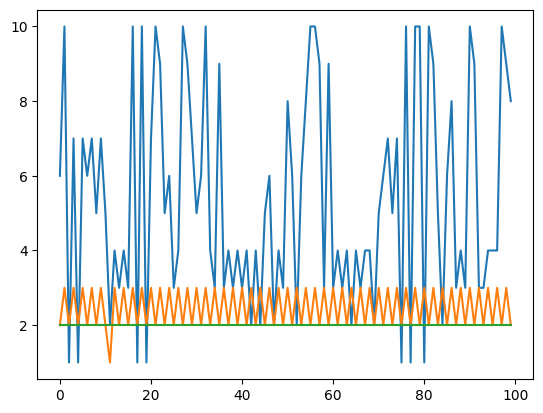

In [63]:
import matplotlib.pyplot as plt

x = []
y_1 = []
y_2 = []
y_3 = []
for i in range(100):
  x.append(i)
  y_1.append(z_true[i])
  y_2.append(sequence[i])
  y_3.append(max_prob[i])

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

# Your solution:



---



---

# Q4: Natural Language Processing (30pt)

**Background:** Markov models and hidden Markov models are often used for modeling written text. A common way of modeling text is to consider each word to be a single observation $x_t$ (perhaps with some preprocessing to appropriately handle punctuation, etc.). In an HMM, the hidden states $z_t$ represent abstract concepts or word types, and they may or may not have a clear interpretation. More complex models are also frequently used to model text, especially higher-order Markov chains and probabilistic context-free grammars (PCFGs).

In this exercise, you will apply a hidden Markov model to a short sample of text resembling stories from a children's book. You will use the Baum-Welch algorithm to estimate the parameters. Using a short sample of text involving a limited vocabulary and relatively simple grammar makes the problem easier. (With a larger sample of text, larger vocabulary, and more complex grammar, a more sophisticated approach would probably be needed.)



**Data:**
The file `x-words.txt` contains a sequence of integers $x_1,...,x_n$, where $x_t$ represents the $t$'th word/symbol in the sample of text.  The file `code-words.txt` contains the mapping from integers to words/symbols. (You will not need `code-words.txt` until part 3.)


**Setup:**
The hidden values z_t belong to the set ${1,...,m}$, for some value of m that we will choose below.  Each observation $x_t$ is an integer in ${1,...,k}$ where $k=59$, since there are 59 distinct words/symbols occurring in the text.  There are $n=292$ observations, $x_1,...,x_n$ (the text is 292 words/symbols long). For each state $i=1,...,m$, we model the emission distribution $p(x_t | z_t=i)$ as an arbitrary probability vector $\phi_i = (\phi_{i1},...,\phi_{ik})$ summing to 1.






---


**Task 1(10pt):** Implement the forward algorithm and backward algorithm. As a sanity check, compute the value of $\log(p(x_1,...,x_n))$ using the forward algorithm, assuming that the parameters are:
- 	$m = 10$
-	$\pi_i = 1/m$ for all $i=1,...,m.$
-	$P_{ij} = 1/m$ for all $i=1,...,m$ and $j=1,...,m$.
-	$\phi_{iw} = 1/k$ for all $i=1,...,m$ and $w=1,...,k.$

Report the value you get.  These parameter values are simple enough that you can analytically calculate $\log(p(x_1,...,x_n))$ to check your answer.



---
**Task 2(10pt):** Implement the Baum-Welch algorithm. For the convergence criterion, stop when the change in $\log(p(x_1,...,x_n))$ from one iteration to the next is less than 0.01. Run the algorithm on the data in `x-words.txt`, with the following settings:
- $m = 10$
- $m = 30$
- $m = 100$

For each $m$, run the algorithm 3 times with different randomly chosen initializations of the parameters (so, you will be doing 9 runs altogether). For each run, report the number of iterations until "convergence" and report the value of $\log(p(x_1,...,x_n))$ at the last iteration.




---


**Task 3(10pt):**
Implement a function that takes the HMM parameters, generates a random sequence of hidden states $z_1,...,z_n$ and observations $x_1,...,x_n$, and (using `code-words.txt`) prints out the sequence of words/symbols corresponding to $x_1,...,x_n$ in a nicely-formatted way.  For each $m = 10, 30$, and 100, run your implementation of the Baum-Welch algorithm to estimate the parameters, generate a random sequence $x_1,...,x_N$ with $N=250$, and print out the corresponding sequence of words/symbols. Discuss the differences you observe between the generated text for m = 10, 30, and 100.




In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/code-words.txt?raw=true -O code-words.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/x-words.txt?raw=true -O x-words.txt


--2023-12-06 19:36:18--  https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/code-words.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476 [text/plain]
Saving to: ‘code-words.txt’

code-words.txt      100%[===================>]     476  --.-KB/s    in 0s      

2023-12-06 19:36:18 (61.1 MB/s) - ‘code-words.txt’ saved [476/476]

--2023-12-06 19:36:18--  https://raw.githubusercontent.com/yexf308/AppliedStochasticProcess/main/image/x-words.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
X = np.loadtxt('x-words.txt')

In [ ]:
dictionary = pd.read_csv('code-words.txt',sep=" ", header=None)
dictionary.columns=["index", "word"]

In [ ]:
dictionary

In [ ]:
# Your code starts here
# Task 1

def forward(log_initial, log_transition, log_emission, v):
    """
    Args:
        initial: a vector of length N
        transition: a matrix of shape N * N
        emission: a matrix of shape V * N
        v: observed sequence, a vector of length T

    Returns:
        log_alpha: a matrix of shape T * N, log_alpha[t, n] denote the sum of all possible latent state sequences ending at step t, state n
        log_Z: a float number
    """
    T = len(v)
    N = log_emission.shape[1]

    log_alpha = np.zeros((T, N))
    log_alpha[0] = log_emission[int(v[0])-1] + log_initial # Q: why this is an addition, not a multiplication?

    for t in range(1, T):
        log_emission_t = log_emission[int(v[t])-1]
        log_alpha[t] = logsumexp(log_alpha[t - 1].reshape(N, 1) +
                                 log_transition +
                                 log_emission_t.reshape(1, N),
                                 axis=0) # Q: what does the `logsumexp` function do here?
                                         # Q: what does the function `reshape` do here?

    log_Z = logsumexp(log_alpha[T - 1], axis=0)  # Q: what does the `logsumexp` function do here?
    return log_alpha, log_Z

def backward(log_initial, log_transition, log_emission, v):
    """
    Args:
        initial: a vector of length N
        transition: a matrix of shape N * N
        emission: a matrix of shape V * N
        v: observed sequence, a vector of length t

    Returns:
        log_beta: a matrix of shape T * N
        log_Z: a float number
    """
    T = len(v)
    N = log_emission.shape[1]

    log_beta = np.zeros((T, N)) # Q: Why is it initialised to zero?

    for t in range(T - 2, -1, -1):
        log_emission_t = log_emission[int(v[t + 1])-1]
        log_beta[t] = logsumexp(log_beta[t + 1].reshape(1, N) +
                                log_transition +
                                log_emission_t.reshape(1, N),
                                axis=1)
    log_Z = logsumexp(log_beta[0] + log_emission[int(v[0])-1] + log_initial) # Q: why is it equal to the log-likelihood?

    return log_beta, log_Z

def get_initial(m):
  return np.log(np.ones(m)*(1/m))

def get_transition(m):
  transition = []
  for i in range(m):
    transition.append(np.ones(m)*(1/m))
  return np.log(transition)

def get_emission(m,k):
  emission = []
  for i in range(k):
    emission.append(np.ones(m)*(1/k))
  return np.log(emission)

m=10
k=59

initial = get_initial(m)
transition = get_transition(m)
emission = get_emission(m,k)

log_alpha, log_z = forward(initial, transition, emission, X)

n = len(log_alpha)

print(logsumexp(log_alpha[n-1]))
print(X[0])

-1190.640933620467
2.0


In [ ]:
# Your code starts here
# Task 2


ValueError: ignored

In [ ]:
# Your code starts here
# Task 3